In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import classification_report

/home/garima/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pwd

'/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_2/Milestone_Project-Week2'

In [3]:
train_data = pd.read_csv("data/train.csv",index_col= "PassengerId")

In [4]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df = train_data.copy()

In [6]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [8]:
# number of surviving/non-surviving passengers
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

[Text(0, 0, 'Not survived'), Text(1, 0, 'Survived')]

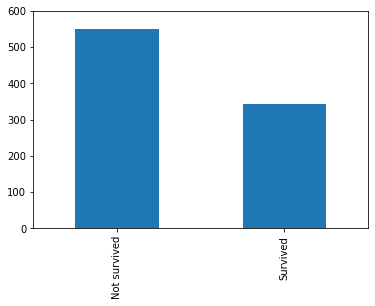

In [9]:
ax = train_df["Survived"].value_counts().plot(kind = "bar", width=0.5)
ax.set_ylim((0, 600))
ax.set_xticklabels(['Not survived','Survived'])

### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [10]:
df_survived_1class = train_df.groupby(['Pclass']).apply(lambda df: pd.Series({'Survived': df[df["Survived"] == 1]["Survived"].count(), 'Not_survived': df[df["Survived"] == 0]["Survived"].count()}))
df_survived_1class['proportion_Survived'] = df_survived_1class['Survived'] / (df_survived_1class['Survived'] + df_survived_1class['Not_survived'])
df_survived_1class.iloc[0,2]

0.6296296296296297

### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

[Text(0.5, 0, 'Passenger class'), Text(0, 0.5, 'Number of passangers')]

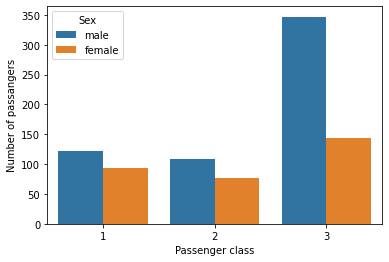

In [11]:
ax = sns.countplot(x = 'Pclass', hue = 'Sex' ,data = train_df)

ax.set( xlabel="Passenger class", ylabel="Number of passangers")

<AxesSubplot:xlabel='Pclass'>

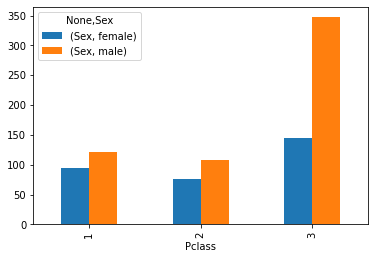

In [12]:
train_df_group = train_df.groupby(['Pclass','Sex'])['Sex'].count().to_frame()
train_df_group.unstack().plot(kind = 'bar')

### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:>

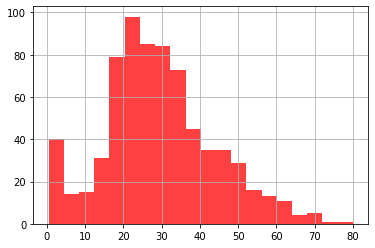

In [13]:
train_df['Age'].hist(bins=20, facecolor='#ff0000',alpha=0.75,histtype='bar')

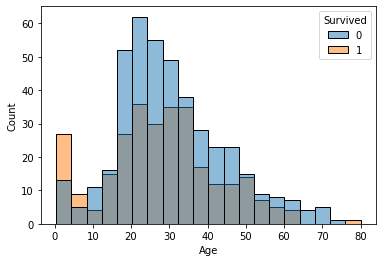

In [14]:
ax = sns.histplot(x = 'Age', hue = 'Survived' ,data = train_df)

### Calculate the average age for survived and drowned passengers separately.

In [15]:
round(train_df.groupby(['Survived'])["Age"].agg("mean"), 1)

Survived
0    30.6
1    28.3
Name: Age, dtype: float64

### Replace missing age values by the mean age.

In [16]:
train_df["Age"].isna().sum()

177

In [17]:
train_df_modified = train_df['Age'].fillna(value = train_df['Age'].mean())

In [18]:
train_df_modified

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

### Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [19]:
train_df.groupby(["Pclass", "Sex"])["Survived"].count().to_frame().reset_index()

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


### Split the data in train and test set

In [20]:
train_data = pd.read_csv("data/train.csv",index_col= "PassengerId")

In [21]:
X = train_df.loc[:, train_df.columns != 'Survived']
y = train_df['Survived']

In [22]:
X.shape, y.shape

((891, 10), (891,))

In [23]:
# Create training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
X_train.shape, y_train.shape

((668, 10), (668,))

### Feature Engineer categorical columns to numeric before train test split for random forest

#### Remove redundant features

In [25]:
# remove Ticket and cabin column
X_train.drop(['Ticket', 'Cabin','Fare'], axis=1,inplace = True)
# test dataset
X_test.drop(['Ticket', 'Cabin','Fare'], axis=1,inplace = True)

In [26]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,S
885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,S
248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,S
479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,S
306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,S
...,...,...,...,...,...,...,...
107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,S
271,1,"Cairns, Mr. Alexander",male,NaN,0,0,S
861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,S


#### create a column with titles and remove the column with names

In [27]:
# getting passenger title from the name column of dataframe

In [28]:
def passenger_title(name):

        title = name.split(".")[0].split(", ")[1]
        
        return title

In [29]:
X_train["Title"] = X_train["Name"].apply(passenger_title)
X_train.drop(['Name'], axis=1, inplace = True)

In [30]:
X_test["Title"] = X_test["Name"].apply(passenger_title)
X_test.drop(['Name'], axis=1, inplace = True)

In [31]:
# fill missing values using mean age of each title eg: Master
X_train['Age'] = X_train['Age'].fillna(X_train.groupby('Title')['Age'].transform('mean'))

#test set
X_test['Age'] = X_test['Age'].fillna(X_test.groupby('Title')['Age'].transform('mean'))

In [32]:
# drop "Title column after filling the missing values of age with mean of each group"
X_train.drop(['Title'], axis=1, inplace = True)
X_test.drop(['Title'], axis=1, inplace = True)

In [33]:
# combine 2 features: Parch and SibSp to a new feature Family
X_train["Family"] = X_train["Parch"] + X_train["SibSp"]
#test set
X_test["Family"] = X_test["Parch"] + X_test["SibSp"]

In [34]:
# drop the redundant features

X_train = X_train.drop(["SibSp","Parch"], axis=1)
X_test = X_test.drop(["SibSp","Parch"], axis=1)

In [35]:
X_train["Family"].value_counts()

0     406
1     117
2      73
3      25
5      17
4       9
6       8
10      7
7       6
Name: Family, dtype: int64

In [36]:
# list of categorical features
categorical_feature_mask = X_train.columns[X_train.dtypes==object].tolist()

# list of categorical features
numeric_feature_mask = X_train.columns[X_train.dtypes!=object].tolist()

In [37]:
numeric_feature_mask

['Pclass', 'Age', 'Family']

In [38]:
# transform categorical feature
categorical_steps = [
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))]

categorical_transformer = Pipeline(categorical_steps)

In [39]:
# transform Family feature
pipeline_family = Pipeline(
[
    ("binning", KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='uniform'))

])


In [40]:
# method 2
transformation = ColumnTransformer(
    [
        ("transform twice imputer_encoder", categorical_transformer, categorical_feature_mask),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary"), ["Sex"]),
        ("binning", KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'), ["Pclass"]),
        ("binning only", pipeline_family, ['Family']),
    ]
)  

In [41]:
X_train_FE = transformation.fit_transform(X_train)

In [42]:
X_test_FE = transformation.transform(X_test)

In [43]:
#X_train_FE = pd.DataFrame(X_train_FE, columns = transformation.get_feature_names_out())

In [44]:
X_train_FE

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [45]:
type(X_train_FE)

numpy.ndarray

### Build a model

In [46]:
X_train

,Pclass,Sex,Age,Embarked,Family
PassengerId,,,,,
299,1,male,32.188333,S,0
885,3,male,25.000000,S,0
248,2,female,24.000000,S,2
479,3,male,22.000000,S,0
306,1,male,0.920000,S,3
...,...,...,...,...,...
107,3,female,21.000000,S,0
271,1,male,32.188333,S,0
861,3,male,41.000000,S,2


In [47]:
# instatiate the model
rf = RandomForestClassifier(n_estimators=300, max_depth=10)

In [48]:
rf.fit(X_train_FE, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [49]:
rf.predict(X_test_FE)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [50]:
rf.score(X_train_FE, y_train) 

0.8188622754491018

In [51]:
rf.score(X_test_FE, y_test) 

0.8116591928251121

In [52]:
importance=rf.feature_importances_

In [53]:
list(zip(importance, X_train.columns))

[(0.18196915411863582, 'Pclass'),
 (0.1940490354663926, 'Sex'),
 (0.023731568064199703, 'Age'),
 (0.01530251399279422, 'Embarked'),
 (0.026075321200756434, 'Family')]

In [54]:
pwd

'/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_2/Milestone_Project-Week2'

In [55]:
y_pred_validation = rf.predict(X_test_FE)

In [56]:
print(classification_report(y_test, y_pred_validation))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       134
           1       0.82      0.67      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [57]:
pwd

'/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_2/Milestone_Project-Week2'

In [58]:
X_test_kaggle = pd.read_csv("data/test.csv",index_col= "PassengerId")

In [59]:
X_test_kaggle["Title"] = X_test_kaggle["Name"].apply(passenger_title)
X_test_kaggle.drop(['Name'], axis=1, inplace = True)

In [60]:
X_test_kaggle['Age'] =X_test_kaggle['Age'].fillna(X_test_kaggle.groupby('Title')['Age'].transform('mean'))

In [61]:
# drop "Title column after filling the missing values of age with mean of each group"
X_test_kaggle.drop(['Title'], axis=1, inplace = True)

In [62]:
# combine 2 features: Parch and SibSp to a new feature Family
X_test_kaggle["Family"] = X_test_kaggle["Parch"] + X_test_kaggle["SibSp"]

In [63]:
# drop the redundant features
X_test_kaggle = X_test_kaggle.drop(["SibSp","Parch"], axis=1)

In [64]:
X_test_kaggle_FE = transformation.transform(X_test_kaggle)

In [65]:
# on the test.csv file i.e. actual test data
y_pred = rf.predict(X_test_kaggle_FE)

In [66]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [67]:
Survived = y_pred

In [68]:
PassengerId= X_test_kaggle.index

In [69]:
# Submit to Kaggle

In [70]:
kaggle_titanic_submission_gk = pd.DataFrame(data=Survived, index=PassengerId, columns=['Survived'])

In [71]:
kaggle_titanic_submission_gk

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [72]:
pwd

'/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_2/Milestone_Project-Week2'

In [73]:
kaggle_titanic_submission_gk.to_csv("kaggle_titanic_submission_gk.csv")  